# Gardening-robot

## Criando um Robô Jardineiro 

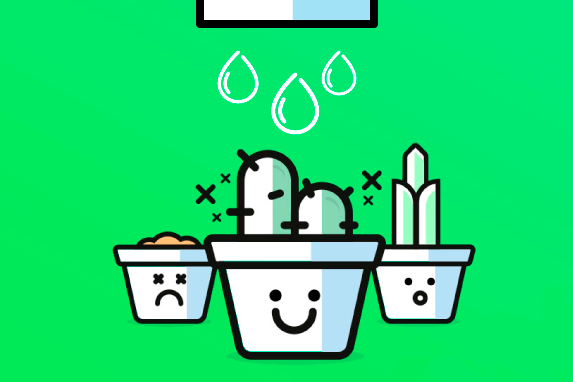

In [1]:
from IPython.display import Image
import csv
Image("p.png")


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

%matplotlib inline

### Explorando dados

In [4]:
df = pd.read_csv('plantacao.csv')

In [5]:
df.columns

Index([u'ID', u' MES', u' DIA', u' Hora', u' umidade '], dtype='object')

In [6]:
print "Total de amostras coletados do dataset: ",len(df)

Total de amostras coletados do dataset:  5403


### Pre-processando dados

In [7]:
df.describe()

,ID,MES,DIA,Hora,umidade
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2.931890,5.514344,20.991116,11.572090,60.335739
std,0.990788,0.499840,1.396667,7.030724,25.768100
min,1.000000,5.000000,19.000000,0.000000,0.000000
25%,2.000000,5.000000,20.000000,5.000000,47.000000
50%,3.000000,6.000000,21.000000,12.000000,64.000000
75%,4.000000,6.000000,22.000000,18.000000,81.000000
max,4.000000,6.000000,23.000000,23.000000,99.000000


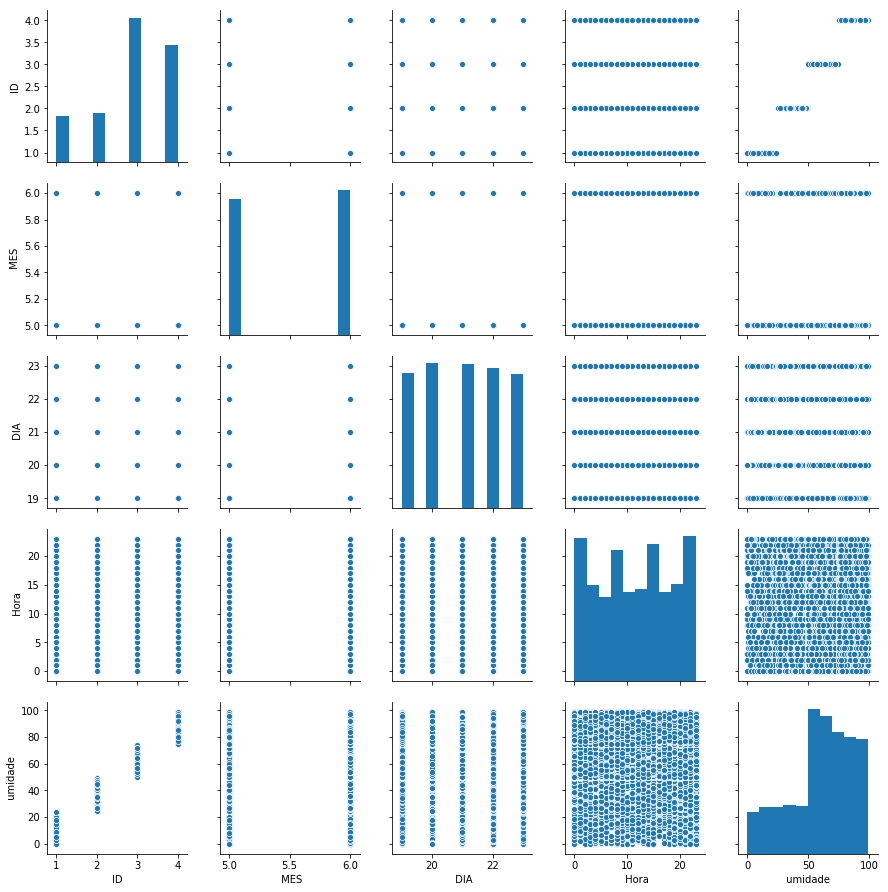

In [9]:
#sb.pairplot(df, hue='ID')
sb.pairplot(df)

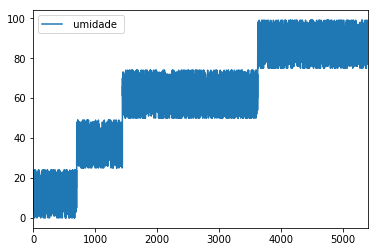

In [10]:
umidade = df[df.columns[4:]] 
umidade.plot()

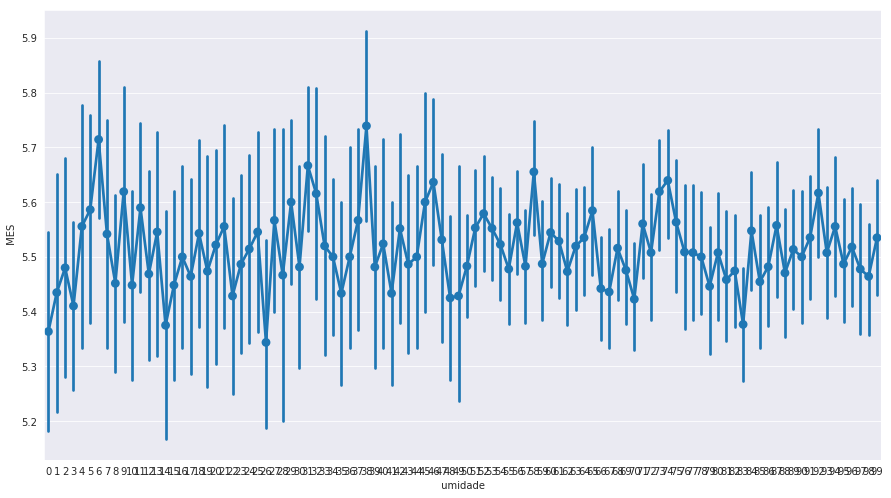

In [11]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()

fig.set_size_inches(15, 8.27)
sns.pointplot(x=" umidade ", y=" MES",data=df, join=True, capsize=0, size=0, aspect=0)


## Criando Variavel de Treino

In [12]:
#print df.drop('ID',axis = 1)
X = np.array(df.drop('ID',axis = 1))

## Criando Variavel de Test

In [13]:
y = np.array(df["ID"])
type(y)
type(df["ID"])

pandas.core.series.Series

### Classificando com K-NN
#### Aqui basicamente vamos pegar nossas variaveis de treino e test e vamos aplicar no classificador que irá aprender de acordo com os dados que colocamos como entrada

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)

In [16]:
print knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')


### Valor  de distancia do K em NN

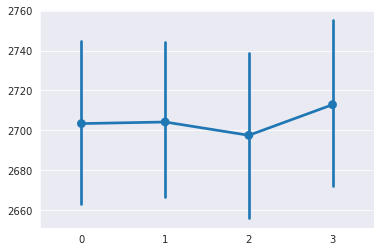

In [17]:
distances, indices = knn.kneighbors(X)
sns.pointplot(data=indices)

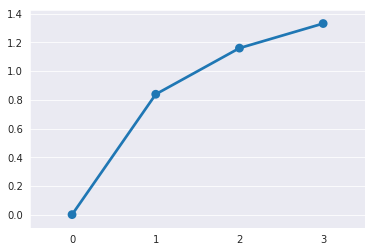

In [18]:
#print distances
sns.pointplot(data=distances)

## Fazendo uma Predição com dados novos de outro sensor

In [19]:
def predicao(lista):
 nivel =  knn.predict([lista])
 if nivel[0] == 1: return [1,"arido"]
 if nivel[0] == 2: return [2,"seco"]
 if nivel[0] == 3: return [3,"umido"]
 if nivel[0] == 4: return [4,"molhado"]

In [20]:
MES = raw_input("MES: ")
DIA = raw_input("DIA: ")
Hora = raw_input("Hora: ")
umidade = raw_input("umidade ")
lista = [MES,DIA, Hora, umidade]
pred = predicao(lista)
print pred

MES: 5
DIA: 4
Hora: 12
umidade 50
[2, 'seco']


/home/painel/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


In [21]:
def csv_writer(data, path):
    with open(path, "wb") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        for line in data:
           writer.writerow(line)


In [48]:
def new_data_sensores():
 MES = int(raw_input("MES: "))
 DIA = int(raw_input("DIA: "))
 Hora = int(raw_input("Hora: "))
 umidade = int(raw_input("umidade "))
 lista = [MES,DIA, Hora, umidade]
 pred = predicao(lista)
 if pred[0] == None:
  print "Fail Read Data" 
 else:   
  print pred
  ID = int(pred[0])
  return "ID: %i; MES: %i; DIA: %i; Hora: %i; umidade: %i " % (ID,MES,DIA,Hora,umidade)



In [49]:
new_data_sensores()

MES: 5
DIA: 5
Hora: 6
umidade 45
[2, 'seco']


'ID: 2; MES: 5; DIA: 5; Hora: 6; umidade: 45 '

In [50]:
def pre_processing(text):
 d = [] 
 dados = text.split("; ")
 for p in range(len(dados)):
    d.append(dados[p].split(":")[1])
 dados = [["ID", "MES", "DIA","Hora","umidade"],d]
 return dados


In [54]:
def gravar_dado(arquivo,text):
 with open(arquivo,'a') as log:
        dados = pre_processing(text)
        writer = csv.writer(log,delimiter=",")
        writer.writerow(dados[1])       
        print dados[1]


In [55]:
def main():
   d = new_data_sensores()
   gravar_dado("plantacao1.csv",d)


In [56]:
main()

MES: 5
DIA: 6
Hora: 8
umidade 4
[1, 'arido']
[' 1', ' 5', ' 6', ' 8', ' 4 ']
